# Analysis of 2019 Pyrenees and Alps - please remember there is no cadence data in this dataset because you did not have a cadence meter on your bicycle

In [1]:
import sourcetocsv as cycle

In [2]:

filepath='c:/temp/'
filename='pyralpsenigma.csv'

cycledf=cycle.getfinalcsvcycledata(filepath,filename)


In [3]:
import thinkstats2
import thinkplot
import numpy as np

In [4]:
cycledf.tail()

,Unnamed: 0,ActivityId,AltitudeMeters,Cadence,DistXY,DistXYZ,DistanceMeters,Duration,ElapasedDuration,Elevation,...,Heartrate,LatitudeDegrees,LongitudeDegrees,RowId,Speed,Speedmps,Time,VerticalClimb,VerticalFall,Watts
200925,200925,_20190914045509,62.227963,NaN,1.690275,1.690573,NaN,1000.0,33457000.0,0.031738,...,NaN,44.106184,9.817067,20190914045509_0013613,NaN,1.690573,2019-09-14 14:12:46,0.031738,0.0,NaN
200926,200926,_20190914045509,62.259641,NaN,4.177153,4.177273,NaN,3000.0,33460000.0,0.031677,...,NaN,44.106166,9.817113,20190914045509_0013614,NaN,1.392424,2019-09-14 14:12:49,0.031677,0.0,NaN
200927,200927,_20190914045509,62.275510,NaN,0.600424,0.600633,NaN,2000.0,33462000.0,0.015869,...,NaN,44.106167,9.817121,20190914045509_0013615,NaN,0.300317,2019-09-14 14:12:51,0.015869,0.0,NaN
200928,200928,_20190914045509,62.296628,NaN,1.270148,1.270323,NaN,2000.0,33464000.0,0.021118,...,NaN,44.106164,9.817136,20190914045509_0013616,NaN,0.635162,2019-09-14 14:12:53,0.021118,0.0,NaN
200929,200929,_20190914045509,62.333615,NaN,0.729212,0.730149,NaN,2000.0,33466000.0,0.036987,...,NaN,44.106161,9.817144,20190914045509_0013617,NaN,0.365075,2019-09-14 14:12:55,0.036987,0.0,NaN


# Probability Mass Functions for level, downhill and uphill

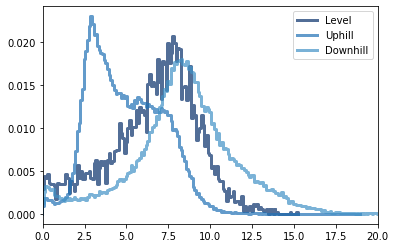

Level:      Mean: 6.597,  Median: 7.0     Std: 2.67
Uphill:     Mean: 4.935,  Median: 4.7     Std: 2.135 
Downhill:   Mean: 8.343,  Median: 8.4     Std: 3.103 


<Figure size 576x432 with 0 Axes>

In [5]:
uphillpmf=thinkstats2.Pmf(np.round(  cycledf['Speedmps'][cycledf['Speedmps']>0][cycledf['Speedmps']<20][cycledf['VerticalClimb']>0],1))
levelpmf=thinkstats2.Pmf(np.round(   cycledf['Speedmps'][cycledf['Speedmps']>0][cycledf['Speedmps']<20][cycledf['Gradient']==100],1))
downhillpmf=thinkstats2.Pmf(np.round(cycledf['Speedmps'][cycledf['Speedmps']>0][cycledf['Speedmps']<20][cycledf['VerticalFall']<0],1))

thinkplot.Pmf(levelpmf,label='Level')
thinkplot.Pmf(uphillpmf,label='Uphill')
thinkplot.Pmf(downhillpmf,label='Downhill')
thinkplot.Config(xlim=[0,20])
thinkplot.show()

print(f'Level:      Mean: {round(levelpmf.Mean(),3)},  Median: {round(levelpmf.Median(),3)}     Std: {round(levelpmf.Std(),3)}' )
print(f'Uphill:     Mean: {round(uphillpmf.Mean(),3)},  Median: {round(uphillpmf.Median(),3)}     Std: {round(uphillpmf.Std(),3)} ' )
print(f'Downhill:   Mean: {round(downhillpmf.Mean(),3)},  Median: {round(downhillpmf.Median(),3)}     Std: {round(downhillpmf.Std(),3)} ' )



# Continuous Distribution Function : Level, Uphill, Downhill

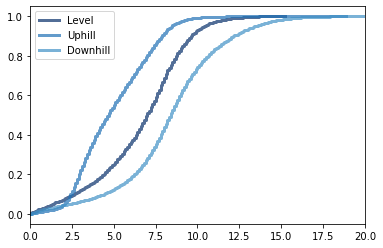

Level:      5th Perc: 1.4      Median: 7.0   95th Perc: 10.4
Uphill:     5th Perc: 2.0      Median: 4.7   95th Perc: 8.5
Downhill:     5th Perc: 2.4      Median: 8.4   95th Perc: 13.5


<Figure size 576x432 with 0 Axes>

In [6]:
uphillcdf=thinkstats2.Cdf(np.round(  cycledf['Speedmps'][cycledf['Speedmps']>0][cycledf['Speedmps']<20][cycledf['VerticalClimb']>0],1))
levelcdf=thinkstats2.Cdf(np.round(   cycledf['Speedmps'][cycledf['Speedmps']>0][cycledf['Speedmps']<20][cycledf['Gradient']==100],1))
downhillcdf=thinkstats2.Cdf(np.round(cycledf['Speedmps'][cycledf['Speedmps']>0][cycledf['Speedmps']<20][cycledf['VerticalFall']<0],1))



thinkplot.Cdf(levelcdf,label='Level')
thinkplot.Cdf(uphillcdf,label='Uphill')
thinkplot.Cdf(downhillcdf,label='Downhill')
thinkplot.Config(xlim=[0,20])
thinkplot.show()

print(f'Level:      5th Perc: {levelcdf.Percentile(5)}      Median: {levelcdf.Percentile(50)}   95th Perc: {levelcdf.Percentile(95)}' )
print(f'Uphill:     5th Perc: {uphillcdf.Percentile(5)}      Median: {uphillcdf.Percentile(50)}   95th Perc: {uphillcdf.Percentile(95)}' )
print(f'Downhill:     5th Perc: {downhillcdf.Percentile(5)}      Median: {downhillcdf.Percentile(50)}   95th Perc: {downhillcdf.Percentile(95)}' )



# Now lets experiment with gradient data

Up:      5th Perc: 0.6      Median: 2.1   95th Perc: 7.8
Samplesize = 101
Down:      5th Perc: 0.6      Median: 4.6   95th Perc: 15.7
Samplesize = 160


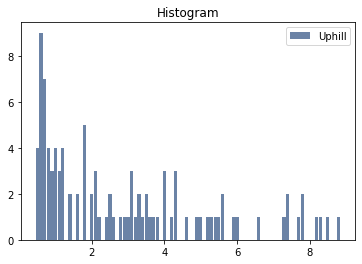

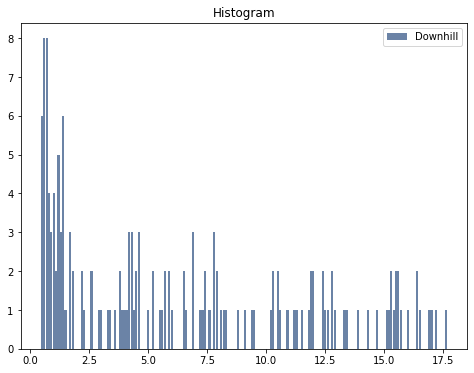

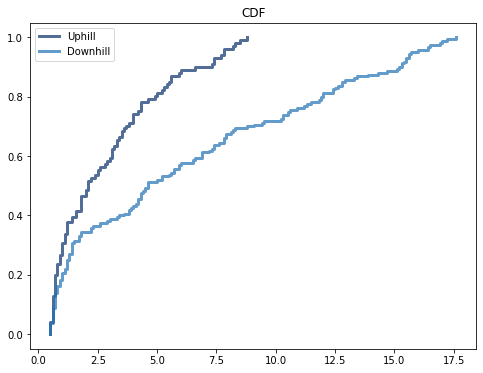

<Figure size 576x432 with 0 Axes>

In [28]:
workdf = cycledf['Speedmps'][cycledf['Speedmps']>=0.5][cycledf['Speedmps']<=20][cycledf['Gradient']>105][cycledf['Gradient']<=150][cycledf['VerticalClimb']>0]


workdf2 = cycledf['Speedmps'][cycledf['Speedmps']>=0.5][cycledf['Speedmps']<=20][cycledf['Gradient']>105][cycledf['Gradient']<=150][cycledf['VerticalFall']<0]

downhist=thinkstats2.Hist(np.round(workdf2,1))
downcdf=thinkstats2.Cdf(np.round(workdf2,1))


Up4to6hist=thinkstats2.Hist(np.round(workdf,1))
Up4to6cdf=thinkstats2.Cdf(np.round(workdf,1))

print(f'Up:      5th Perc: {Up4to6cdf.Percentile(5)}      Median: {Up4to6cdf.Percentile(50)}   95th Perc: {Up4to6cdf.Percentile(95)}' )
print(f'Samplesize = {len(workdf)}')


print(f'Down:      5th Perc: {downcdf.Percentile(5)}      Median: {downcdf.Percentile(50)}   95th Perc: {downcdf.Percentile(95)}' )
print(f'Samplesize = {len(workdf2)}')

thinkplot.Hist(Up4to6hist,label = 'Uphill')
thinkplot.Config(title='Histogram')
thinkplot.show()

thinkplot.Hist(downhist,label = 'Downhill')
thinkplot.Config(title='Histogram')
thinkplot.show()

thinkplot.Cdf(Up4to6cdf,label='Uphill')
thinkplot.Cdf(downcdf,label='Downhill')
thinkplot.Config(title='CDF')
thinkplot.show()
